In [2]:
import numpy as np

In [3]:
import pylab as plt
import pandas as pd
import networkx as nx

In [4]:
edge_list = [(0,2), (0,1), (0,3), (2,4), (5,6), (7,4), (0,6), (5,3), (3,7), (0,8)]

In [5]:
goal = 7

In [7]:
G = nx.Graph()
G.add_edges_from(edge_list)

In [8]:
pos = nx.spring_layout(G)

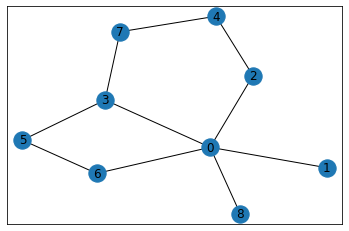

In [9]:
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()

In [10]:
MATRIX_SIZE = 9

In [11]:
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [13]:
for edge in edge_list:
    if edge[1] == goal:
        R[edge] = 100
    else:
        R[edge] = 0
    if edge[0] == goal:
        R[edge[::-1]] = 100
    else:
        R[edge[::-1]] = 0
R[goal, goal] = 100

In [46]:
pd.DataFrame(R)

,0,1,2,3,4,5,6,7,8
0,-1.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,0.0
1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0
3,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,100.0,-1.0
4,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,100.0,-1.0
5,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0
6,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
7,-1.0,-1.0,-1.0,0.0,0.0,-1.0,-1.0,100.0,-1.0
8,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [57]:
gamma = 0.8

In [60]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))  # q table

In [20]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
# helper functions
def get_available_actions(state):
    curr_state_row = R[state,]
    available_actions = np.where(curr_state_row >= 0)[1]
    return available_actions

def sample_next_action(available_actions):
    next_action = np.random.choice(available_actions, size=1)
    return int(next_action)

def update_q_function(current_state, action, gamma):
    max_index = np.where(Q[action, ] == np.max(Q[action,]))[1]
    print('Max index', max_index.shape)
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print(R[current_state, action] + gamma * max_value)

In [73]:
initial_state = 0

In [74]:
available_actions = get_available_actions(initial_state)

In [75]:
print(available_actions)

[1 2 3 6 8]


In [76]:
action = sample_next_action(available_actions)

In [77]:
print(action)

1


In [80]:
update_q_function(initial_state, action, gamma)

Max index (9,)
0.0


In [82]:
# running iteration to populate Q table for optimal policy value
for i in range(700):
    curr_state = np.random.randint(0, int(Q.shape[0]))
    available_actions = get_available_actions(curr_state)
    action = sample_next_action(available_actions)
    update_q_function(curr_state, action, gumma)

Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
100.0
Max index (9,)
0.0
Max index (1,)
180.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (1,)
180.0
Max index (1,)
244.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (1,)
244.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (9,)
0.0
Max index (1,)
244.0
Max index (9,)
0.0
Max index (1,)
195.20000000000002
Max index (9,)
0.0
Max index (1,)
195.20000000000002
Max index (1,)
195.20000000000002
Max index (1,)
156.16000000000003
Max index (1,)
156.16000000000003
Max index (1,)
156.16000000000003
Max i

Max index (1,)
391.4206427098593
Max index (1,)
250.50921133430998
Max index (1,)
493.13651416788747
Max index (1,)
313.13651416788747
Max index (1,)
394.50921133431
Max index (1,)
394.50921133431
Max index (2,)
250.50921133430998
Max index (1,)
394.50921133431
Max index (1,)
313.13651416788747
Max index (1,)
315.607369067448
Max index (1,)
313.13651416788747
Max index (1,)
315.607369067448
Max index (1,)
313.13651416788747
Max index (1,)
313.13651416788747
Max index (1,)
315.607369067448
Max index (1,)
313.13651416788747
Max index (1,)
313.13651416788747
Max index (1,)
315.607369067448
Max index (1,)
394.50921133431
Max index (1,)
313.13651416788747
Max index (1,)
250.50921133430998
Max index (1,)
493.13651416788747
Max index (1,)
394.50921133431
Max index (1,)
394.50921133431
Max index (1,)
315.607369067448
Max index (1,)
394.50921133431
Max index (1,)
315.607369067448
Max index (1,)
394.50921133431
Max index (1,)
252.48589525395843
Max index (1,)
394.50921133431
Max index (1,)
250.5

In [83]:
# trained q table
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8
0,0.000000,253.750973,316.485895,396.485895,0.000000,0.000000,253.188716,0.000000,253.750973
1,317.188716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,317.188716,0.000000,0.000000,0.000000,397.750973,0.000000,0.000000,0.000000,0.000000
3,317.188716,0.000000,0.000000,0.000000,0.000000,317.188716,0.000000,497.188716,0.000000
4,0.000000,0.000000,318.200778,0.000000,0.000000,0.000000,0.000000,497.188716,0.000000
5,0.000000,0.000000,0.000000,396.485895,0.000000,0.000000,253.750973,0.000000,0.000000
6,317.188716,0.000000,0.000000,0.000000,0.000000,317.188716,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,396.485895,396.485895,0.000000,0.000000,497.188716,0.000000
8,317.188716,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [85]:
# normalize q table
pd.DataFrame(Q*100/np.max(Q))

,0,1,2,3,4,5,6,7,8
0,0.000000,51.037154,63.655084,79.745554,0.000000,0.000000,50.924067,0.0,51.037154
1,63.796443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,63.796443,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000,0.0,0.000000
3,63.796443,0.000000,0.000000,0.000000,0.000000,63.796443,0.000000,100.0,0.000000
4,0.000000,0.000000,64.000000,0.000000,0.000000,0.000000,0.000000,100.0,0.000000
5,0.000000,0.000000,0.000000,79.745554,0.000000,0.000000,51.037154,0.0,0.000000
6,63.796443,0.000000,0.000000,0.000000,0.000000,63.796443,0.000000,0.0,0.000000
7,0.000000,0.000000,0.000000,79.745554,79.745554,0.000000,0.000000,100.0,0.000000
8,63.796443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [ ]:
curr_step = 0

steps = [curr_step]
while curr_step != goal:
    next_step_index = np.where(Q[curr_state, ] == np.max(Q[curr_state]))[1]
    if len(next_step_index.shape) > 1:
        next_step = np.random.choice(next_step_index, size=1)
    else:
        next_step = int(next_step_index)
    steps.append(next_step)
    curr_step = next_step

In [ ]:
print(steps)

In [ ]:
steps